# Necessary installs and imports

In [1]:
!pip install xgboost gymnasium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


[notice] A new release of pip available: 22.2.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


# Machine Learning


The main idea: Learn from the data -> Data is experience




Statistics vs Machine Learning
- Inference vs Prediction i.e. why something happens vs will something happen
- Understand underlying data generation process vs Make predictions on unseen data

# Type of Learning Methods

There are 3 main types of learnings: Supervised, Unsupervised, and Reinforcement learning

### Supervised Learning

- The prediction problem
- Given independent variables/covariates/features predict the dependent variables/outcome/label

### Unsupervised Learning

- The assignment problem
- Given the data, find underlying patterns from it

### Reinforcement Learning

- The decision problem
- Given the data, find the sequence of actions/decisions which maximizes the reward

# Supervised Learning (Deep Dive)

Given the data i.e. features and labels, the goal is to find a mapping function from features to labels

Mathematical Problem definition:

$$\text{Let } D = \{(X_1, y_1), (X_2, y_2), ...\}\text{ be the data with } d \text{ features i.e.}$$

$$X \in ℝ^{d} \text{ , } y \in ℝ$$

$$\text{The goal is to find a function }f \in ℋ  \text{(function space)} \text{ such that, }$$

$$ \min_{f \in ℋ} 𝔼_{X \in D} [L(f(X),y)]$$

It is important to note that, based on $ℋ$ i.e. function space or set of possible function, we get different types of ML model


### Type of features/labels:

1. Continous features: The variable can take any values between any range e.g. $x \in ℝ, x \in ℕ$
2. Categorical features: The variable can one of the values from a set e.g. $x \in \{0,1\}, x \in \{Yes, No\}$
3. Ordinal features: Similar to categorical features but values have ordering e.g. $x \in \{Short, Medium, Tall\}$

### Regression vs Classification

- Regression: The label is continous variable
  - Revenue for accounts in next quarter
  - Stock price for next day

- Classification: The label is categorical/ordinal variable
  - Whether it is picture of cat or not
  - Whether an account with buy servers or not
  - Whether an email is spam or not

## Type of models

Based on the set $ℋ$, we limit the total number of possible functions.

For example, $ℋ$ can the set of
- Linear functions form $AX + b$
- Functions which represent series of if-else tests
- Boolean functions with AND, OR and NOT functions

When we fix $ℋ$ to a particular set, it leads to restriction of search space and if the true mapping function $f$ does not belong in it, we would never find it. Hence, by selecting $ℋ$, we are making an assumption that $$f \in ℋ$$

Theoretically, $ℋ$ can any set of arbitrary functions with is also arbitrary large. However, to be practical ML model, we also need way to efficiently search the entire space to find out function $f$.

Note: Alongwith model assumptions, we also need to select hyperparameters for each of them with further add up to the total assumptions.

### Dataset for Classification

Let the true function from which generate dataset be

$$ f(x_1, x_2) = sign(1.2 + 2x_1 - 3x_2 - x_1^2 + 0.5x_2^3) $$

$$ sign(x) = 1 \text{ if } x ≥ 0 \text{ else } -1 $$

In [2]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator
import matplotlib.pyplot as plt


# Generate the dataset
class TrueModel(BaseEstimator):
    def __init__(self, w, b):
        self.w = w
        self.b = b

    def predict(self, X):
        X = np.array(X)
        x3 = np.square(X[:,0])
        x4 = np.power(X[:,1],3)
        X = np.column_stack((X, x3, x4))
        return np.sign(np.dot(X, self.w) + self.b)


def generate_dataset(f, n=100):
  xs = np.random.randn(n,2)
  ys = f.predict(xs)
  return pd.DataFrame({'x1': xs[:, 0], 'x2': xs[:, 1], 'y': ys})

w = [2,-3,-1,0.1]
b = 1.2
f = TrueModel(w,b)

df = generate_dataset(f,500)

# Display first few rows
print(df.head())


         x1        x2    y
0  0.645379  1.563949 -1.0
1  0.405740 -1.020616  1.0
2 -0.213181  0.031337  1.0
3 -1.721111  0.095882 -1.0
4  1.116240  2.471268 -1.0


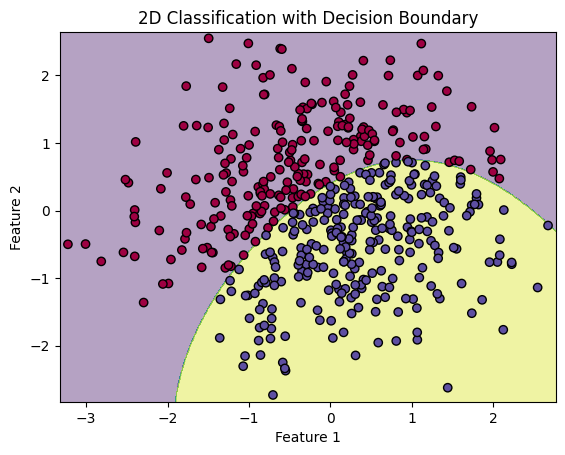

In [3]:
#Generic code that takes trained sklearn model, 2d classification dataset, and plots data and decision boundary
def plot_decision_boundary(model, X, y):
    columns = X.columns
    X = X.to_numpy()
    y = y.to_numpy()
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=columns))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k')
    plt.title("2D Classification with Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(f, df[['x1', 'x2']], df['y'])

### Linear models
  - Logistic regression
  - SVM

[[ 2.61152051 -4.14808439]] [0.71016916]


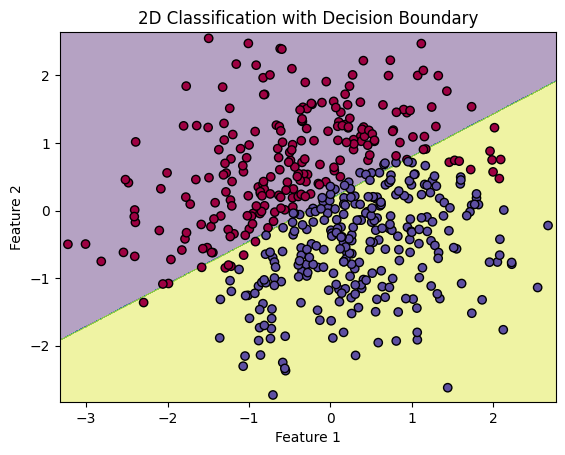

In [4]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(df[['x1', 'x2']], df['y'])

print(log_model.coef_, log_model.intercept_)

plot_decision_boundary(log_model, df[['x1', 'x2']], df['y'])

[[ 2.1134664  -2.89813144]] [0.60825314]


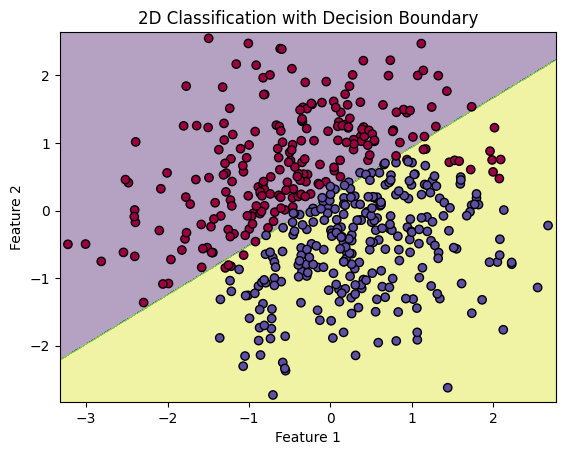

In [5]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(df[['x1', 'x2']], df['y'])

print(svm_model.coef_, svm_model.intercept_)

plot_decision_boundary(svm_model, df[['x1', 'x2']], df['y'])

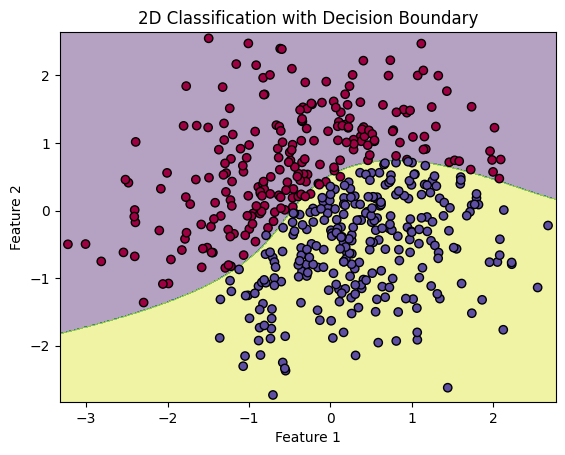

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly = PolynomialFeatures(degree=3)

model = make_pipeline(poly, LogisticRegression())

model.fit(df[['x1', 'x2']], df['y'])

plot_decision_boundary(model, df[['x1', 'x2']], df['y'])

### Probablistic models
  - Naive bayes

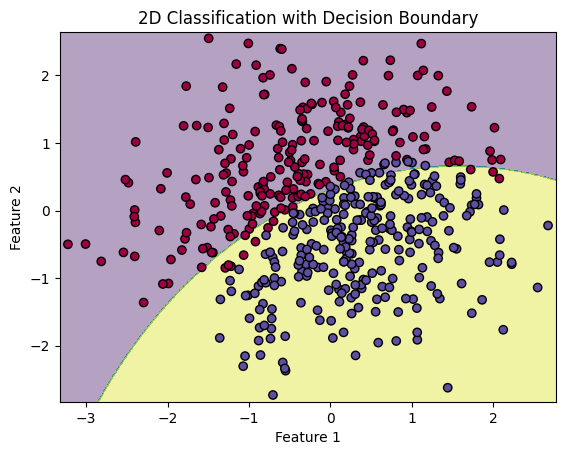

In [7]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(df[['x1', 'x2']], df['y'])

plot_decision_boundary(nb_model, df[['x1', 'x2']], df['y'])

### Non-linear models
  - KNN
  - Decision tree
  - Neural network

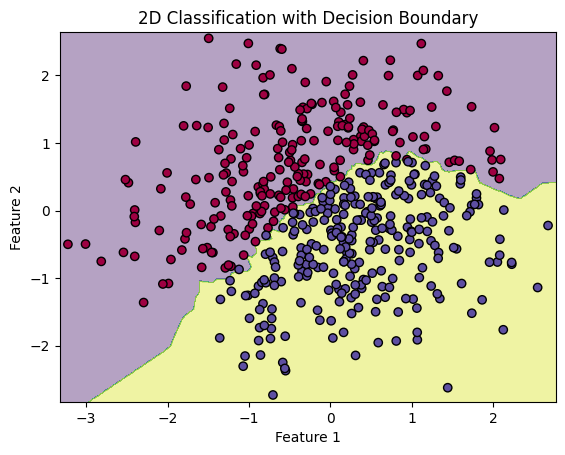

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(df[['x1', 'x2']], df['y'])

plot_decision_boundary(knn_model, df[['x1', 'x2']], df['y'])

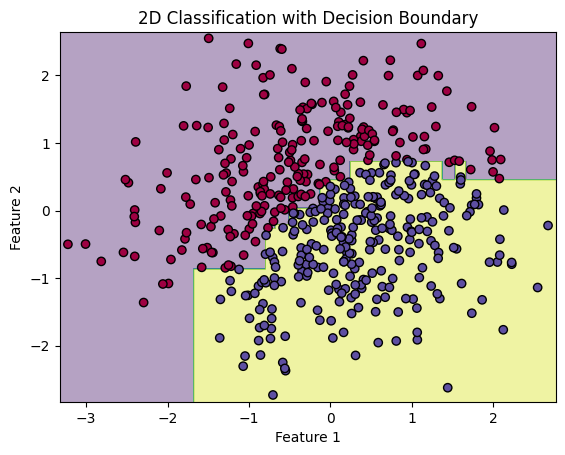

In [9]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(df[['x1', 'x2']], df['y'])

plot_decision_boundary(dt_model, df[['x1', 'x2']], df['y'])

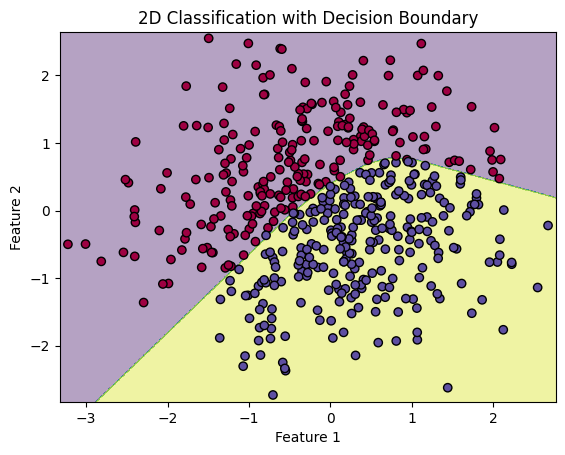

In [10]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)
nn_model.fit(df[['x1', 'x2']], df['y'])

plot_decision_boundary(nn_model, df[['x1', 'x2']], df['y'])

### Ensemble model
  - Random Forest
  - XgBoost

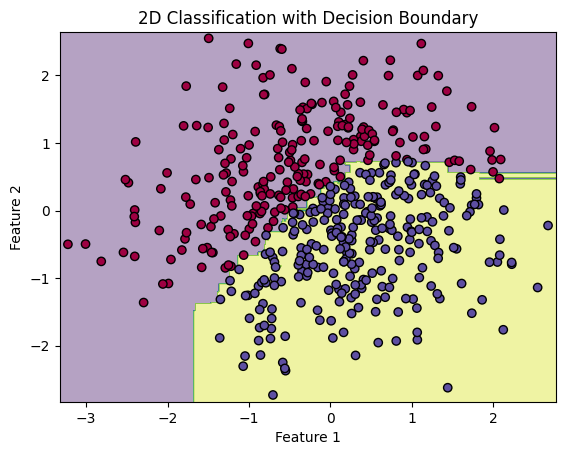

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=10)
rf_model.fit(df[['x1', 'x2']], df['y'])

plot_decision_boundary(rf_model, df[['x1', 'x2']], df['y'])

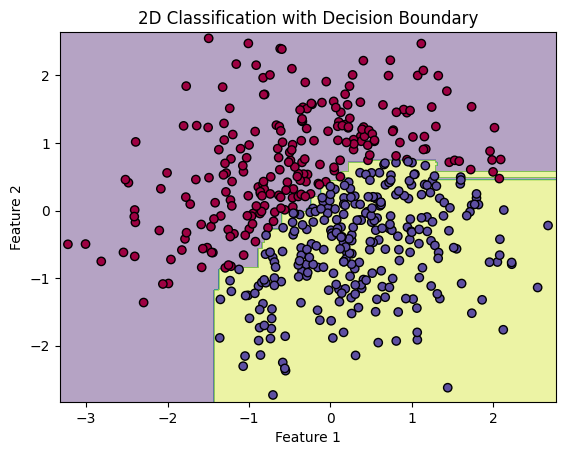

In [12]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
y = df['y'].map({-1: 0, 1: 1})
xgb_model.fit(df[['x1', 'x2']], y)

plot_decision_boundary(xgb_model, df[['x1', 'x2']], y)

## Loss function analysis

Given $D = \{X, y\}$ and let actual mapping function be $f$ and $ϵ$ be the noise i.e.

$$ y = f(X) + ϵ $$

Also, expected value of noise is $ 𝔼[ϵ] = 0$

After training $\hat{f}$ is the selected then

$$ L(\hat{f}(X), y) = 𝔼_{X \in 𝔻}[(y - \hat{f}(X))^2]$$

$$ L(\hat{f}(X), y) = 𝔼[(f(X) + ϵ - \hat{f}(X))^2]$$

$$ L(\hat{f}(X), y) = 𝔼[((f(X) - \hat{f}(X)) + ϵ)^2]$$

Let us assume $a = f(X), b = \hat{f}(X),  𝔼[a] = a $,
$$ = 𝔼[ ((a - b) + ϵ)^2 ] $$
$$ = 𝔼[ (a - b)^2 + 2ϵ(a - b) + ϵ^2 ] $$
$$ = 𝔼[(a - b)^2] + 𝔼[2ϵ(a - b)] + 𝔼[ϵ^2] $$
$$ = 𝔼[(a - b)^2] + 2𝔼[ϵ]𝔼[(a - b)] + 𝔼[ϵ^2] $$
$$ = 𝔼[(a - b)^2] + 0 + 𝔼[ϵ^2] $$
$$ = 𝔼[(a - 𝔼[b] + 𝔼[b] - b)^2] + Var[ϵ] $$
$$ = 𝔼[(a - 𝔼[b])^2 + (𝔼[b] - b)^2 + 2(a - 𝔼[b])(𝔼[b] - b)] + Var[ϵ] $$
$$ = 𝔼[(a - 𝔼[b])^2] + 𝔼[(𝔼[b] - b)^2] + 2𝔼[(a - 𝔼[b])(𝔼[b] - b)] + Var[ϵ] $$

Lets work on individual terms

The first term:
$$ 𝔼[(a - 𝔼[b])^2] = 𝔼[a^2 - 2a𝔼[b] + 𝔼[b]^2]$$
$$ 𝔼[(a - 𝔼[b])^2] = 𝔼[a^2] - 𝔼[2a𝔼[b]] + 𝔼[𝔼[b]^2]$$
$$ 𝔼[(a - 𝔼[b])^2] = E[a^2] - 2𝔼[a]𝔼[𝔼[b]] + 𝔼[𝔼[b]^2] $$
$$ 𝔼[(a - 𝔼[b])^2] = a^2 - 2𝔼[a]𝔼[b] + 𝔼[b]^2 $$
$$ 𝔼[(a - 𝔼[b])^2] = (a - E[b])^2 $$

$$\text{This is called Bais: }(f(X) - 𝔼[\hat{f}(X)])$$

Second term:
$$𝔼[(𝔼[b] - b)^2] = 𝔼[(b - 𝔼[b])^2] $$
$$𝔼[(𝔼[b] - b)^2] = Var[b] $$

$$ \text{This is called Variance: }Var[\hat{f}(X)]$$

Third term:
$$𝔼[(a - 𝔼[b])(𝔼[b] - b)] = 𝔼[a𝔼[b] - ab - 𝔼[b]^2 + 𝔼[b]b] $$
$$𝔼[(a - 𝔼[b])(𝔼[b] - b)] = a𝔼[b] - a𝔼[b] - 𝔼[b]^2 + 𝔼[b]^2] = 0 $$


Back to main derivation

$$ L(\hat{f}(X), y) = (f(X) - 𝔼[\hat{f}(X)])^2 + Var[\hat{f}(X)] + Var[ϵ] $$

$$ L(\hat{f}(X), y) = (\text{Bias})^2 + \text{Variance} + \text{Irreducable Error} $$

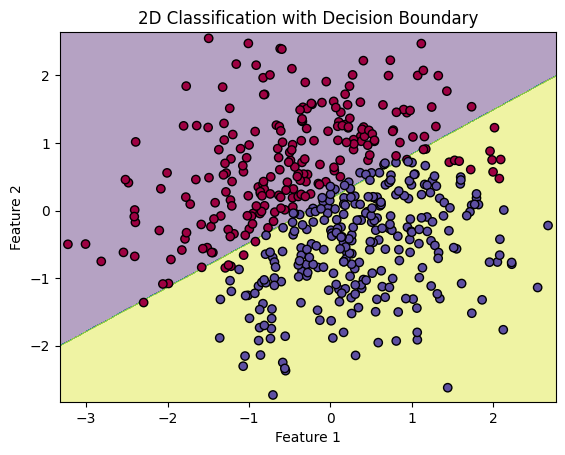

In [13]:
mlp = MLPClassifier(hidden_layer_sizes=(3), activation='identity', max_iter=1000)
mlp.fit(df[['x1', 'x2']], df['y'])

plot_decision_boundary(mlp, df[['x1', 'x2']], df['y'])

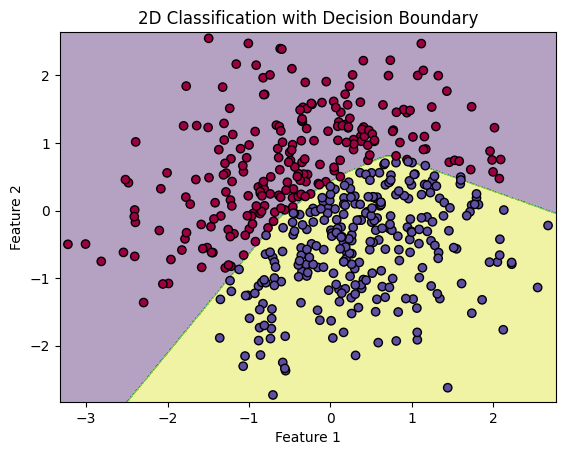

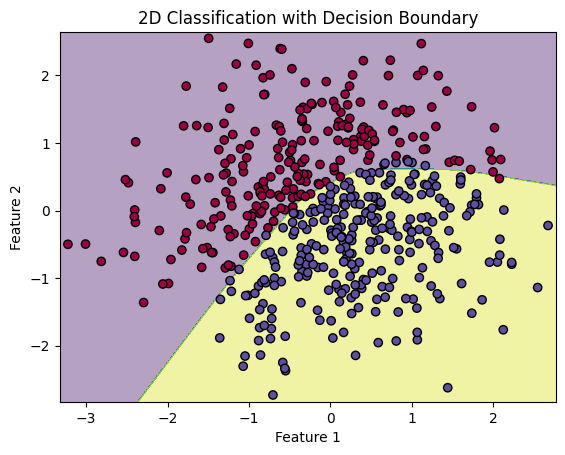

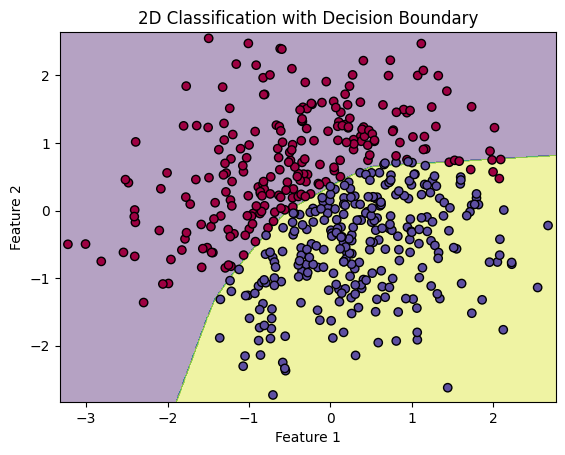

In [14]:
mlp = MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=1000)


for i in range(3):
  df_temp = generate_dataset(f,500)
  mlp.fit(df_temp[['x1', 'x2']], df_temp['y'])
  plot_decision_boundary(mlp, df[['x1', 'x2']], df['y'])

## Training and Evaluation

###Dataset splitting

In reality, we don't have access to entire dataset $D$, instead we have $\hat{D}$ which contain $n$ data points randomly sampled from $D$

Hence, we need to partition $\hat{D}$ into $D_{train}$ and $D_{test}$ sampled randomly

$D_{train}$ is used to train the model and $D_{test}$ is used to evaluate it.

However, $D_{test}$ can be used only once. If already used, it gives baised evaluation of model which is useless.


###Cross validation

Single evaluation is not enough, we need evaluation to make decisions like select hyperparameters, when to stop training or select models

For this, we further split $D_{train}$ into partitions $D_{train}'$ and $D_{validation}$.

$D_{train}'$ is used for training after making certain decisions and $D_{validation}$ is used for evaluating the output function.

There are various validation methods:
- K-fold cross validation
- Leave-one-out cross validation

<img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png" alt="ML Workflow" width="500">


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['x1', 'x2']], df['y'], test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)

(300, 2) (100, 2) (100, 2)


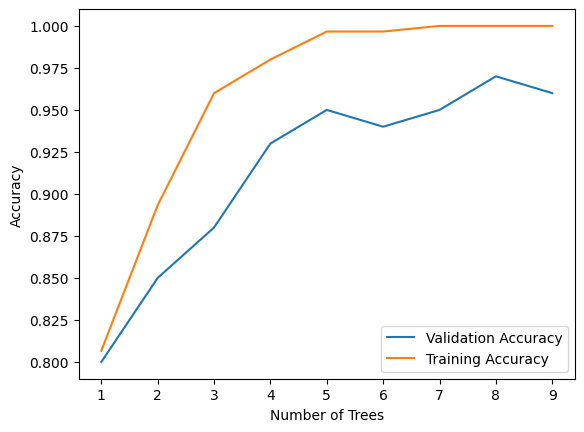

In [19]:
# Showing bais variance tradeoff of performance vs iteractions
from sklearn.metrics import accuracy_score
from warnings import simplefilter
simplefilter(action='ignore')

train_accuracy_scores = []
val_accuracy_scores = []
for i in range(1, 10):
  dt = DecisionTreeClassifier(max_depth=i)
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_train)
  train_accuracy_scores.append(accuracy_score(y_train, y_pred))

  y_pred = dt.predict(X_val)
  val_accuracy_scores.append(accuracy_score(y_val, y_pred))

plt.plot(range(1, 10), val_accuracy_scores, label='Validation Accuracy')
plt.plot(range(1, 10), train_accuracy_scores, label='Training Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



# Reinforcement Learning

Generally, Reinforcement learning problem is defined as Markov Decision Process where an agent, at any given point of time, is in one states, and can take various actions to move to another state. Each state has an reward attached to it. The goal is select the sequence of actions leading to maximum reward.

MDP is defined with following
- States $S = \{s_1, s_2, ...\}$
- Actions $A = \{a_1, a_2, ...\}$
- Transition function $T(s,a,s') \in [0,1]$ which give probability of leading at $s'$ from $s$ by taking action $a$  
- Reward funciton $r(s) \in ℝ$
- Starting state $s_{0}$ and Terminal state $s_{t}$


The goal is to learn a policy function $\pi(s) \in A$ i.e. mapping from states to action given by
$$\pi^* = \arg \max 𝔼[Σ_{k \in K} r(s_k)] $$

where trajectory $K = \{ (s_0, a_0), (s_1, a_1), (s_2, a_2),...,(s_K, a_K) \}$ and $a_i = \pi(s_i)$


Note: If there is no terminal state or trajectory is too long, we introduce discount $γ \in [0,1]$ which tells how much future reward is important to us

$$\pi^* = \arg \max 𝔼[Σ_{k \in K} \gamma^k r(s_k)] $$

In [17]:
import gymnasium as gym

env = gym.make("Taxi-v3", render_mode="ansi")
n_states = env.observation_space.n
n_actions = env.action_space.n

# Hyperparameters
alpha = 0.1
gamma = 0.99
epsilon = 0.1
episodes = 1000

# Value function
V = np.zeros(n_states)

def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.choice(n_actions)
    # Estimate value for each action using one-step lookahead
    q_values = []
    for a in range(n_actions):
        transitions = env.unwrapped.P[state][a]
        q = sum([prob * (reward + gamma * V[next_state]) for prob, next_state, reward, done in transitions])
        q_values.append(q)
    return np.argmax(q_values)

def run_episode(policy, render=False):
    state, _ = env.reset()
    done = False
    steps = 0
    if render:
        print(env.render())
    while not done and steps < 30:
        action = policy(state)
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        state = next_state
        if render:
            print(env.render())
        steps += 1
    return reward

# Show episode before training
print("Before Training:")
run_episode(lambda s: np.random.choice(n_actions), render=True)


Before Training:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |

-1

In [18]:
# TD(0) Training
for _ in range(episodes):
    state, _ = env.reset()
    done = False
    while not done:
        action = choose_action(state)
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        V[state] += alpha * (reward + gamma * V[next_state] - V[state])
        state = next_state

# Show episode after training
print("\nAfter Training:")
run_episode(lambda s: choose_action(s), render=True)


After Training:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
|_: : : 

20